***Importation des données***

In [18]:
#!pip install --upgrade --force-reinstall gensim tensorflow spacy numpy scipy pandas scikit-learn matplotlib nltk


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.3 MB/s eta 0:00:00
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━

In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
df.shape

(5171, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


 ***Visualisation de la répartition des labels***

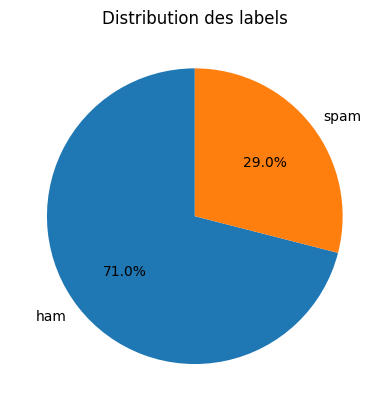

In [8]:
import matplotlib.pyplot as plt

label=df["label"].value_counts()
label.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Distribution des labels")
plt.show()

***Suppression des doublons***

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(5171, 4)

***Suppression de la colonne inutile***

In [9]:
df.drop(columns=["Unnamed: 0"])

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


***Prétraitement des données textuelles avec spaCy***

In [10]:
import spacy
nlp=spacy.load("en_core_web_s
m")

x=df["text"]

texts = []
for mail in x :
    text = []
    doc = nlp(mail)
    for token in doc :
      if not token.is_stop and not token.is_punct and not token.like_num:
        text.append(token.lemma_)
    texts.append(text)

texts[:5]

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


[['subject',
  'enron',
  'methanol',
  'meter',
  '\r\n',
  'follow',
  'note',
  'give',
  'monday',
  'preliminary',
  '\r\n',
  'flow',
  'datum',
  'provide',
  'daren',
  '\r\n',
  'override',
  'pop',
  's',
  'daily',
  'volume',
  'presently',
  'reflect',
  'daily',
  '\r\n',
  'activity',
  'obtain',
  'gas',
  'control',
  '\r\n',
  'change',
  'need',
  'asap',
  'economics',
  'purpose'],
 ['subject',
  'hpl',
  'nom',
  'january',
  '\r\n',
  'attached',
  'file',
  'hplnol',
  'xls',
  '\r\n',
  'hplnol',
  'xls'],
 ['subject',
  'neon',
  'retreat',
  '\r\n',
  'ho',
  'ho',
  'ho',
  'wonderful',
  'time',
  'year',
  'neon',
  'leader',
  'retreat',
  'time',
  '\r\n',
  'know',
  'time',
  'year',
  'extremely',
  'hectic',
  's',
  'tough',
  'think',
  'past',
  'holiday',
  'life',
  'past',
  'week',
  'december',
  'january',
  's',
  'd',
  'like',
  'think',
  'minute',
  '\r\n',
  'calender',
  'hand',
  'beginning',
  'fall',
  'semester',
  'retreat',
  's

***Création du dictionnaire et représentation Bag-of-Words (BoW)***

In [11]:
import gensim
dictionary = gensim.corpora.Dictionary(texts)
bow = [dictionary.doc2bow(text) for text in texts]

***Construction des vecteurs TF-IDF***

In [12]:
tfidf = gensim.models.TfidfModel(bow)
tfidf_vectors = [tfidf[doc] for doc in bow]

***Conversion en matrice dense TF-IDF***

In [13]:
import numpy as np
from scipy.sparse import csr_matrix

vocab_size = len(dictionary)

tfidf_dense = gensim.matutils.corpus2dense(tfidf_vectors, num_terms=vocab_size).T

***Séparation des données en ensembles d'entraînement et de test***

In [14]:
from sklearn.model_selection import train_test_split

X = tfidf_dense
y = df["label_num"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Neural Networks Model**

**Entraînement et évaluation du modèle Neural Network**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7697 - loss: 0.4708 - val_accuracy: 0.9903 - val_loss: 0.0608
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9959 - loss: 0.0334 - val_accuracy: 0.9903 - val_loss: 0.0308
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0058 - val_accuracy: 0.9923 - val_loss: 0.0334
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0027 - val_accuracy: 0.9923 - val_loss: 0.0331
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 9.6376e-04 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9903 - val_loss: 0.0349
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.9188e-04 - val_accuracy: 0.9913 - val_loss: 0.0355
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.0362e-04 - val

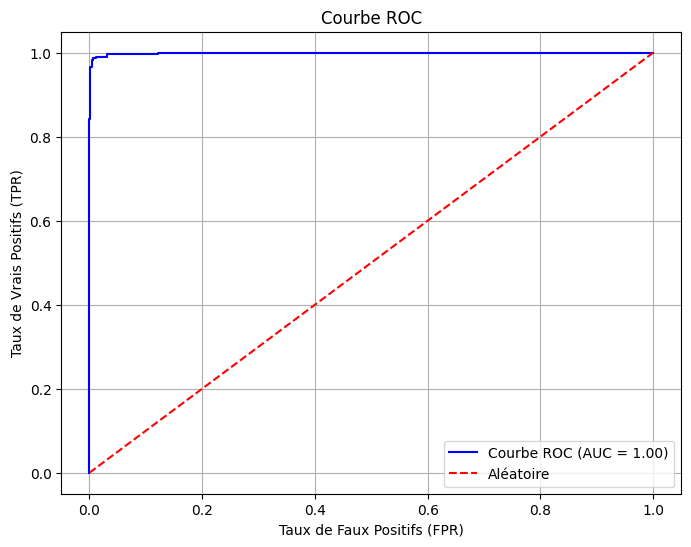

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Neural Network Model Definition
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Prédire les probabilités pour les classes
y_prob = model.predict(X_test).flatten()  # Probabilités pour la classe '1' (spam)

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Afficher les résultats
print(f"AUC: {roc_auc:.2f}")

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Aléatoire')  # La diagonale (chance aléatoire)
plt.title('Courbe ROC')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



***Validation croisée***

In [16]:
from sklearn.model_selection import StratifiedKFold

# Define K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train, test in kfold.split(X, y):
    # Initialize a new model for each fold
    model = Sequential([
        Dense(128, input_dim=X.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model.fit(X[train], y[train], epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1])  # Append accuracy score

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Cross-validation accuracy scores: [0.990338146686554, 0.9912959337234497, 0.990328848361969, 0.988394558429718, 0.9951643943786621]
Mean CV accuracy: 0.9911043763160705


**New Email Prediction**

In [29]:
# Prediction for a new email
new_message = input("Veuillez entrer un mail à vérifier : ")

# Preprocess the new email
new_text = []
new_doc = nlp(new_message)
for token in new_doc:
    if not token.is_stop and not token.is_punct and not token.like_num:
        new_text.append(token.lemma_)

new_bow = dictionary.doc2bow(new_text)
new_tfidf_vector = tfidf[new_bow]
new_dense_vector = gensim.matutils.corpus2dense([new_tfidf_vector], num_terms=len(dictionary)).T

# Predict with the trained neural network
new_prediction = model.predict(new_dense_vector)

result = "ham" if new_prediction[0] < 0.5 else "spam"

print(f"Le message est classifié comme : {result}")


Veuillez entrer un mail à vérifier : Subject: Work From Home & Earn $5000/Week! No experience needed! Flexible hours! Just click the link below and start earning today: [Fake Job Link]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Le message est classifié comme : ham


In [ ]:
model.save("mon_modele_spam.h5")

In [ ]:
from google.colab import files
files.download("mon_modele_spam.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dictionary.save("mon_dictionnaire.dict")

In [ ]:
files.download("mon_dictionnaire.dict")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Naive Bayes Model**

***Entraînement et évaluation du modèle Naive Bayes***

Accuracy: 0.9323671497584541

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.76      0.86       293

    accuracy                           0.93      1035
   macro avg       0.96      0.88      0.91      1035
weighted avg       0.94      0.93      0.93      1035



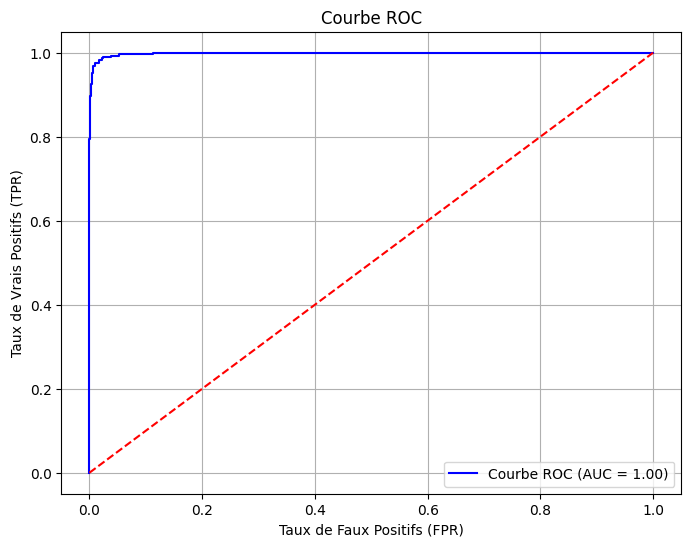

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Prédire les probabilités pour les classes
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 'spam' (1)

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # La diagonale (chance aléatoire)
plt.title('Courbe ROC')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Cross-Validation**

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

print("Scores de validation croisée :", scores)
print("Moyenne des scores :", scores.mean())

Scores de validation croisée : [0.92077295 0.93326886 0.94197292 0.92843327 0.91199226]
Moyenne des scores : 0.9272880516543791


***Prédiction d'un nouveau mail***

In [26]:
new_message = input("Veuillez entrer un mail à vérifier : ")

new_text = []
new_doc = nlp(new_message)
for token in new_doc:
    if not token.is_stop and not token.is_punct and not token.like_num:
        new_text.append(token.lemma_)


new_bow = dictionary.doc2bow(new_text)

new_tfidf_vector = tfidf[new_bow]


new_dense_vector = gensim.matutils.corpus2dense([new_tfidf_vector], num_terms=len(dictionary)).T


prediction = nb_model.predict(new_dense_vector)


result = "ham" if prediction[0] == 0 else "spam"
print(f"Le message est classifié comme : {result}")

Veuillez entrer un mail à vérifier : Subject: Work From Home & Earn $5000/Week! No experience needed! Flexible hours! Just click the link below and start earning today: [Fake Job Link]
Le message est classifié comme : ham


# **SVM Model**

### **Entrainement du model SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure the model has been trained and `X_test` and `y_test` are available

# Compute decision scores (required for ROC in SVM)
y_prob = svm_model.decision_function(X_test)

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### **Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')


print("Scores de validation croisée :", scores)
print("Moyenne des scores :", scores.mean())

###***Prédiction d'un nouveau mail***

In [ ]:
new_message = input("Veuillez entrer un mail à vérifier : ")

# Preprocess the new email
new_text = []
new_doc = nlp(new_message)
for token in new_doc:
    if not token.is_stop and not token.is_punct and not token.like_num:
        new_text.append(token.lemma_)

# Convert the new email into Bag-of-Words
new_bow = dictionary.doc2bow(new_text)

# Convert the BOW representation into a TF-IDF vector
new_tfidf_vector = tfidf[new_bow]

# Convert the sparse vector to dense format
new_dense_vector = gensim.matutils.corpus2dense([new_tfidf_vector], num_terms=len(dictionary)).T

# Make a prediction using the trained SVM model
prediction = svm_model.predict(new_dense_vector)

# Map the prediction result to a human-readable label
result = "ham" if prediction[0] == 0 else "spam"
print(f"Le message est classifié comme : {result}")


# **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute decision scores for ROC curve
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Cross Validation**

In [ ]:
# Cross-validation
scores = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

###**Prediction of a new Email**

In [ ]:
# Prediction for a new email
new_message = input("Veuillez entrer un mail à vérifier : ")

# Preprocess the new email
new_text = []
new_doc = nlp(new_message)
for token in new_doc:
    if not token.is_stop and not token.is_punct and not token.like_num:
        new_text.append(token.lemma_)

# Convert to TF-IDF representation
new_bow = dictionary.doc2bow(new_text)
new_tfidf_vector = tfidf[new_bow]
new_dense_vector = gensim.matutils.corpus2dense([new_tfidf_vector], num_terms=len(dictionary)).T

# Predict using Logistic Regression
prediction = log_reg_model.predict(new_dense_vector)
result = "ham" if prediction[0] == 0 else "spam"
print(f"Le message est classifié comme : {result}")